In [81]:
import torch
import torchvision

import matplotlib.pyplot as plt
from torch import nn

from torchvision import datasets
from torchvision import transforms
from sklearn.metrics import accuracy_score


In [221]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [82]:
# torchvision.transforms, help with converting image to numbers
# torch.utils.data.Dataset, base dataset class
# torch.utils.data.DataLoader, creates python iterable over a dataset


In [83]:
train_data = datasets.FashionMNIST(
	root='datasets/',
	train=True,
	download=False,
	transform=transforms.ToTensor(),
	target_transform=None
)

test_data = datasets.FashionMNIST(
	root='datasets/',
	train=False,
	download=False,
	transform=transforms.ToTensor(),
	target_transform=None
)


In [222]:
X_train, y_train = (train_data.data / 255).to(device), train_data.targets.to(device)
X_test, y_test = (test_data.data / 255).to(device), test_data.targets.to(device)

X_train = X_train.type(torch.float).reshape((60000, -1)).requires_grad_(True)
X_test = X_test.type(torch.float).reshape((10000, -1))


In [244]:
torch.manual_seed(23)
model = nn.Sequential(
	nn.Linear(in_features=784, out_features=32),
	nn.Sigmoid(),
	nn.Linear(in_features=32, out_features=32),
	nn.Sigmoid(),
	nn.Linear(in_features=32, out_features=32),
	nn.Sigmoid(),
	nn.Linear(in_features=32, out_features=10)
).to(device)


In [246]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.5)

epochs = 3000
for epoch in range(1, 1+epochs):
	model.train()
	preds = model(X_train)
	loss = loss_fn(preds, y_train)
	optimizer.zero_grad()
	loss.backward()
	optimizer.step()

	model.eval()
	with torch.inference_mode():
		test_preds = model(X_test)
		test_loss = loss_fn(test_preds, y_test)
		acc = accuracy_score(y_test.cpu(), test_preds.cpu().argmax(dim=1))*100

	if epoch%50 == 0:
		print(f'{epoch = }\t{loss = :.3f}\t{test_loss = :.3f}\t accuracy = {acc:.2f}%')


epoch = 50	loss = 0.457	test_loss = 0.504	 accuracy = 82.37%
epoch = 100	loss = 0.442	test_loss = 0.490	 accuracy = 83.57%
epoch = 150	loss = 0.481	test_loss = 0.511	 accuracy = 82.06%
epoch = 200	loss = 0.438	test_loss = 0.477	 accuracy = 83.37%
epoch = 250	loss = 0.462	test_loss = 0.508	 accuracy = 82.86%
epoch = 300	loss = 0.433	test_loss = 0.482	 accuracy = 83.12%
epoch = 350	loss = 0.435	test_loss = 0.485	 accuracy = 83.77%
epoch = 400	loss = 0.415	test_loss = 0.464	 accuracy = 84.26%
epoch = 450	loss = 0.412	test_loss = 0.461	 accuracy = 84.09%
epoch = 500	loss = 0.417	test_loss = 0.463	 accuracy = 84.27%
epoch = 550	loss = 0.416	test_loss = 0.457	 accuracy = 84.07%
epoch = 600	loss = 0.410	test_loss = 0.455	 accuracy = 84.06%
epoch = 650	loss = 0.436	test_loss = 0.488	 accuracy = 82.99%
epoch = 700	loss = 0.405	test_loss = 0.455	 accuracy = 84.53%
epoch = 750	loss = 0.459	test_loss = 0.490	 accuracy = 82.55%
epoch = 800	loss = 0.404	test_loss = 0.450	 accuracy = 84.26%
epoch = 8

tensor([6, 6, 2], device='cuda:0')
tensor([2, 4, 4], device='cuda:0')
Coat
Shirt


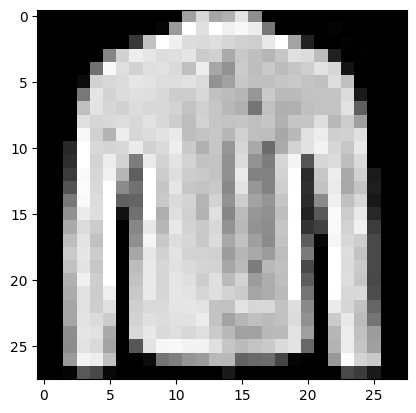

In [260]:
print(test_preds[49:52].argmax(dim=1))
print(y_test[49:52])

plt.imshow(X_test[50].reshape((28,28)).cpu(), cmap='gray', vmin=0, vmax=1)
print(test_data.classes[y_test[50]])
print(test_data.classes[test_preds[50].argmax()])
